In [122]:
import numpy as np
import matplotlib.pyplot as plt

from aeons.utils import *
from aeons.endpoint import EndModel
from aeons.plotting import *

In [25]:
x = np.linspace(0, 1, 100)

def cau(x, theta):
    c, gamma = theta
    return 1 / ((1 + x**(2/c)/gamma**2) ** (1+2/c))

In [33]:
def logcauchy(X, theta, torched=False):
    logLmax, c, gamma = theta
    if torched:
        import torch
        return logLmax - (1 + c)/2 * torch.log( 1 + X**(2/c)/(gamma**2) )
    return logLmax - (1 + c)/2 * np.log( 1 + X**(2/c)/(gamma**2) )

In [55]:
def minimise(logL, X, x0):
    def func(theta):
        return np.sum((logL - logcauchy(X, theta))**2)
    from scipy.optimize import minimize
    return minimize(func, x0)

In [53]:
logX = np.linspace(-40, 0, 100)
X = np.exp(logX)
theta = [-12, 4, 0.001]
logL = logcauchy(X, theta)

In [60]:
minimise(logL[-10:], X[-10:], x0=[-10, 5, 0.1])

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 5.393849775835533e-06
        x: [-1.233e+01  3.994e+00  1.059e-03]
      nit: 23
      jac: [-1.223e-02  8.457e-02 -5.435e+01]
 hess_inv: [[ 4.105e+01  1.726e+01  1.677e-02]
            [ 1.726e+01  7.259e+00  7.056e-03]
            [ 1.677e-02  7.056e-03  6.863e-06]]
     nfev: 352
     njev: 85

In [63]:
name, samples = get_samples('lcdm', 'BAO')
model = EndModel(samples)

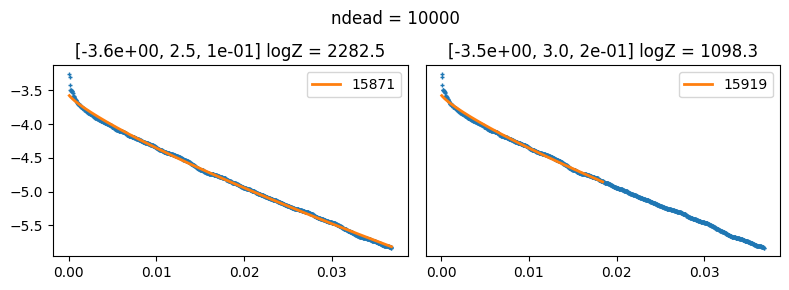

In [125]:
plot_split(model, ndead=10000, splits=2)

In [119]:
ndead = 15000
logLlive, Xlive, nk, logZdead = model.data(ndead, live=True)
theta_min = minimise(logLlive, Xlive, [-5, 1, 0.1]).x
theta_min

/home/zixiao/Documents/III/project/env/lib/python3.10/site-packages/anesthetic/labelled_pandas.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  results.append((f(*args), l))


array([-3.1865972 ,  5.59057313, -0.75942221])

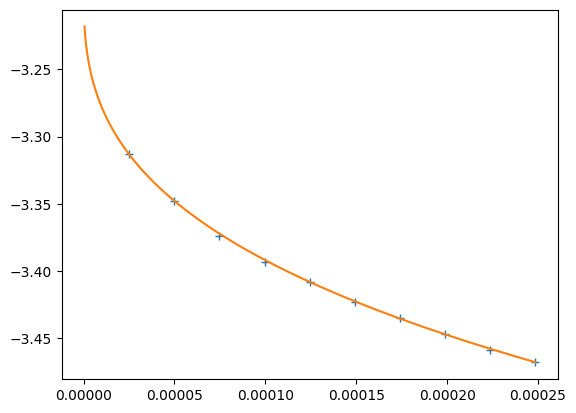

In [121]:
plt.plot(Xlive[::100], logLlive[::100], '+', ms=6)
plt.plot(Xlive, logcauchy(Xlive, theta_min))

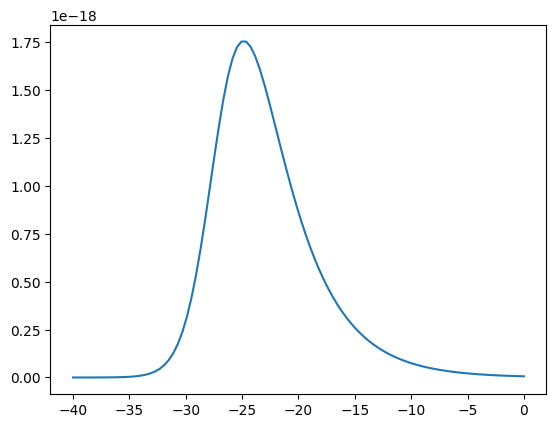

In [54]:
plt.plot(logX, np.exp(logL) * X)

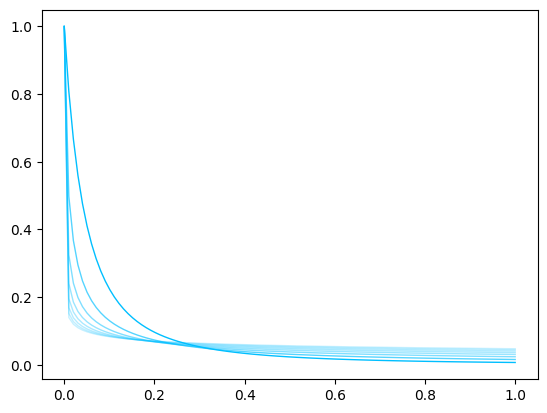

In [31]:
for c in range(2, 10):
    theta = [c, 0.3]
    plt.plot(x, cau(x, theta), lw=1, alpha=2/c, color='deepskyblue')